In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


In [18]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)


In [19]:
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [27]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                16016     
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [28]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5776 - accuracy: 0.7106 - binary_crossentropy: 0.5776 - val_loss: 0.4415 - val_accuracy: 0.8177 - val_binary_crossentropy: 0.4415 - 1s/epoch - 27ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3748 - accuracy: 0.8440 - binary_crossentropy: 0.3748 - val_loss: 0.3520 - val_accuracy: 0.8517 - val_binary_crossentropy: 0.3520 - 317ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3245 - accuracy: 0.8668 - binary_crossentropy: 0.3245 - val_loss: 0.3332 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.3332 - 298ms/epoch - 6ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3093 - accuracy: 0.8720 - binary_crossentropy: 0.3093 - val_loss: 0.3295 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3295 - 298ms/epoch - 6ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3025 - accuracy: 0.8754 - binary_crossentropy: 0.3025 - val_loss: 0.3291 - val_accuracy: 0.8613 - val_binary_crossentropy: 0.3291 - 293ms/epoch - 6ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2984 - accuracy: 0.8772 - binary_cr

In [29]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 4004      
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [30]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6665 - accuracy: 0.5667 - binary_crossentropy: 0.6665 - val_loss: 0.6268 - val_accuracy: 0.6231 - val_binary_crossentropy: 0.6268 - 1s/epoch - 21ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5878 - accuracy: 0.7077 - binary_crossentropy: 0.5878 - val_loss: 0.5589 - val_accuracy: 0.7556 - val_binary_crossentropy: 0.5589 - 275ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5329 - accuracy: 0.7918 - binary_crossentropy: 0.5329 - val_loss: 0.5188 - val_accuracy: 0.8017 - val_binary_crossentropy: 0.5188 - 268ms/epoch - 5ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4987 - accuracy: 0.8295 - binary_crossentropy: 0.4987 - val_loss: 0.4921 - val_accuracy: 0.8296 - val_binary_crossentropy: 0.4921 - 275ms/epoch - 6ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4738 - accuracy: 0.8508 - binary_crossentropy: 0.4738 - val_loss: 0.4730 - val_accuracy: 0.8406 - val_binary_crossentropy: 0.4730 - 277ms/epoch - 6ms/step
Epoch 6/20
49/49 - 0s - loss: 0.4546 - accuracy: 0.8618 - binary_cr

In [31]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               512512    
                                                                 
 dense_20 (Dense)            (None, 512)               262656    
                                                                 
 dense_21 (Dense)            (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [32]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.4269 - accuracy: 0.7971 - binary_crossentropy: 0.4269 - val_loss: 0.3320 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3320 - 2s/epoch - 40ms/step
Epoch 2/20
49/49 - 1s - loss: 0.2903 - accuracy: 0.8796 - binary_crossentropy: 0.2903 - val_loss: 0.3341 - val_accuracy: 0.8540 - val_binary_crossentropy: 0.3341 - 1s/epoch - 25ms/step
Epoch 3/20
49/49 - 1s - loss: 0.2289 - accuracy: 0.9094 - binary_crossentropy: 0.2289 - val_loss: 0.3363 - val_accuracy: 0.8580 - val_binary_crossentropy: 0.3363 - 1s/epoch - 23ms/step
Epoch 4/20
49/49 - 1s - loss: 0.1218 - accuracy: 0.9603 - binary_crossentropy: 0.1218 - val_loss: 0.4098 - val_accuracy: 0.8446 - val_binary_crossentropy: 0.4098 - 1s/epoch - 25ms/step
Epoch 5/20
49/49 - 1s - loss: 0.0346 - accuracy: 0.9932 - binary_crossentropy: 0.0346 - val_loss: 0.5123 - val_accuracy: 0.8472 - val_binary_crossentropy: 0.5123 - 1s/epoch - 23ms/step
Epoch 6/20
49/49 - 1s - loss: 0.0071 - accuracy: 0.9996 - binary_crossentro

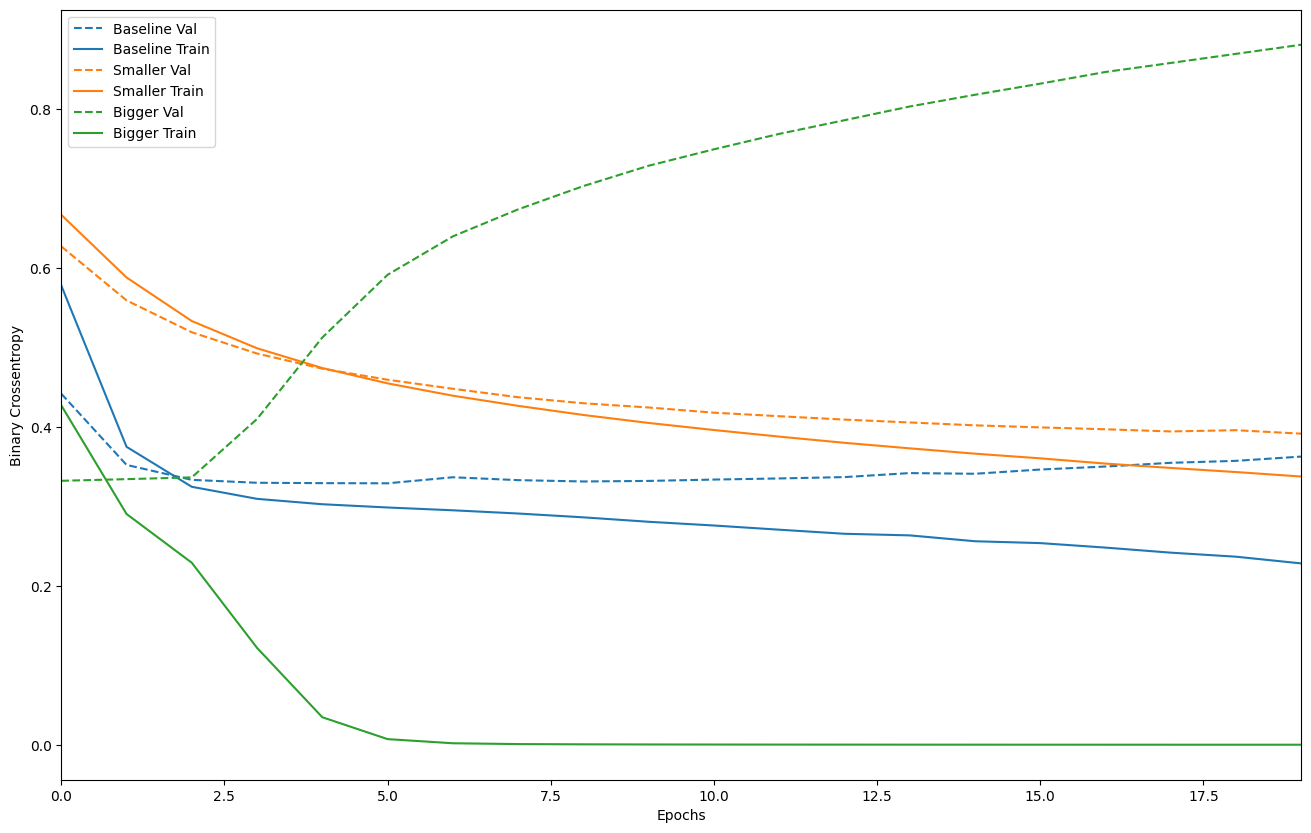

In [38]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [39]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5983 - accuracy: 0.7261 - binary_crossentropy: 0.5558 - val_loss: 0.4525 - val_accuracy: 0.8288 - val_binary_crossentropy: 0.4118 - 1s/epoch - 22ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3984 - accuracy: 0.8521 - binary_crossentropy: 0.3584 - val_loss: 0.3791 - val_accuracy: 0.8578 - val_binary_crossentropy: 0.3401 - 289ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3610 - accuracy: 0.8668 - binary_crossentropy: 0.3229 - val_loss: 0.3748 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3377 - 291ms/epoch - 6ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3481 - accuracy: 0.8722 - binary_crossentropy: 0.3118 - val_loss: 0.3629 - val_accuracy: 0.8609 - val_binary_crossentropy: 0.3275 - 295ms/epoch - 6ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3407 - accuracy: 0.8738 - binary_crossentropy: 0.3060 - val_loss: 0.3610 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3270 - 289ms/epoch - 6ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3387 - accuracy: 0.8749 - binary_cr

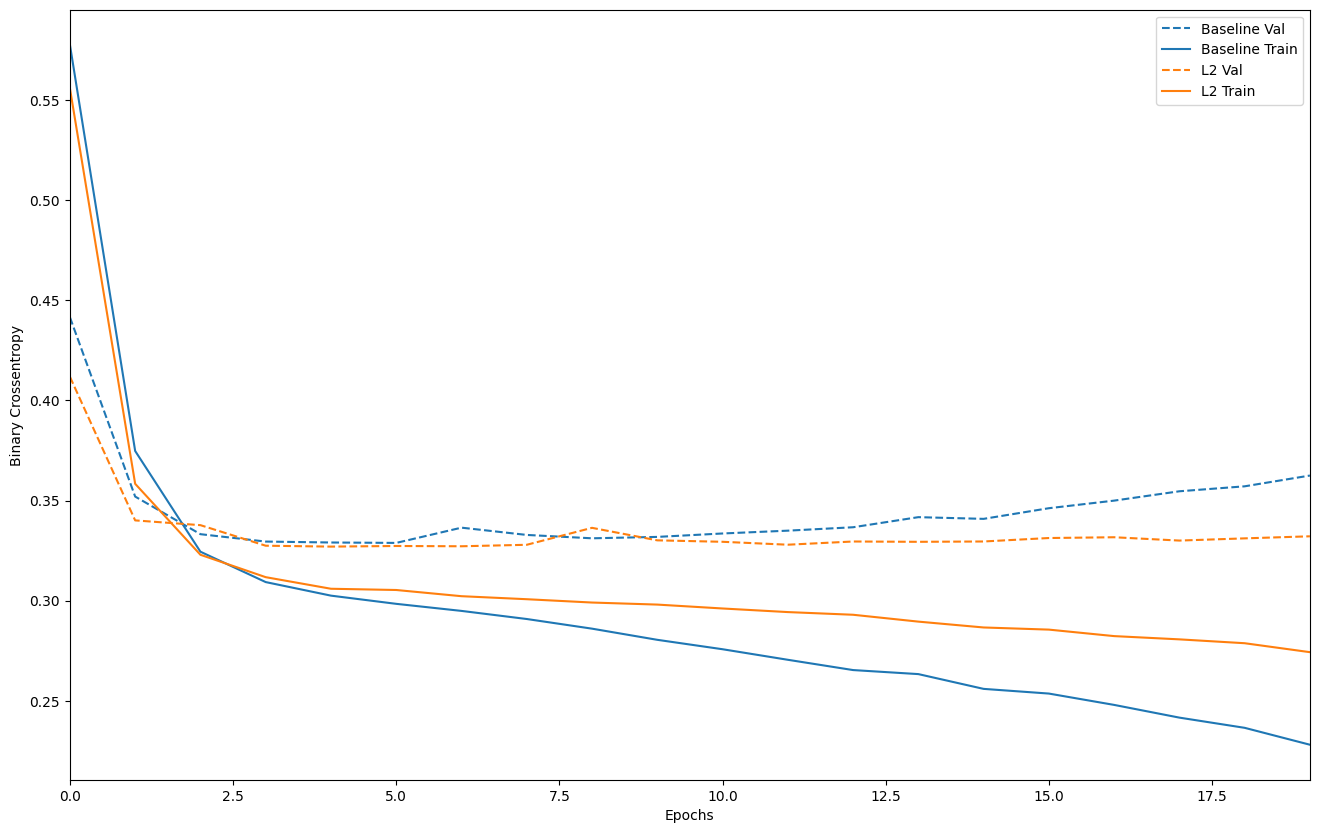

In [40]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [41]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6652 - accuracy: 0.5830 - binary_crossentropy: 0.6652 - val_loss: 0.5889 - val_accuracy: 0.7732 - val_binary_crossentropy: 0.5889 - 1s/epoch - 22ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5599 - accuracy: 0.7125 - binary_crossentropy: 0.5599 - val_loss: 0.4459 - val_accuracy: 0.8221 - val_binary_crossentropy: 0.4459 - 345ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4715 - accuracy: 0.7862 - binary_crossentropy: 0.4715 - val_loss: 0.3794 - val_accuracy: 0.8452 - val_binary_crossentropy: 0.3794 - 339ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4191 - accuracy: 0.8202 - binary_crossentropy: 0.4191 - val_loss: 0.3428 - val_accuracy: 0.8544 - val_binary_crossentropy: 0.3428 - 328ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3907 - accuracy: 0.8398 - binary_crossentropy: 0.3907 - val_loss: 0.3331 - val_accuracy: 0.8566 - val_binary_crossentropy: 0.3331 - 327ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3727 - accuracy: 0.8484 - binary_cr

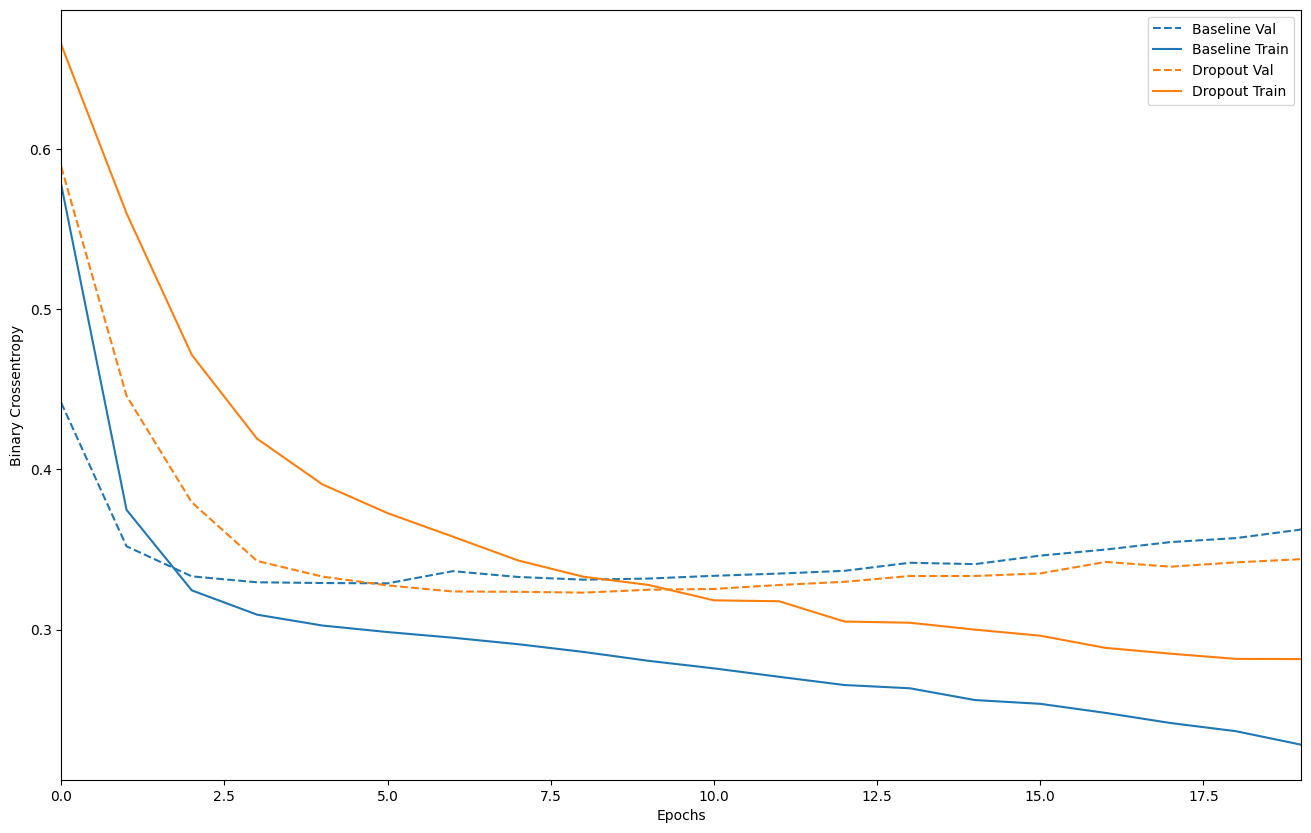

In [42]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])